In [1]:
import pandas as pd
from fastai.text.all import *
from transformers import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

import blurr


from transformers import BartForConditionalGeneration, BartTokenizer

from datasets import load_dataset

In [2]:
dataset = load_dataset("samsum",cache_dir="D:\\Study\\Sem7\\Final Year\\cache\\datasets\\lad")

Reusing dataset samsum (D:\Study\Sem7\Final Year\cache\datasets\lad\samsum\samsum\0.0.0\f1d7c6b7353e6de335d444e424dc002ef70d1277109031327bc9cc6af5d3d46e)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [4]:
train=dataset['train'].to_pandas()+dataset['test'].to_pandas()+dataset['validation'].to_pandas()

In [5]:
train

,id,dialogue,summary
0,138185131386285613817023,"Amanda: I baked cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)Hannah: Hey, do you have Betty's number?\nAmanda: Lemme check\nHannah: <file_gif>\nAmanda: Sorry, can't find it.\nAmanda: Ask Larry\nAmanda: He called her last time we were at the park together\nHannah: I don't know him well\nHannah: <file_gif>\nAmanda: Don't be shy, he's very nice\nHannah: If you say so..\nHannah: I'd rather you texted him\nAmanda: Just text him 🙂\nHannah: Urgh.. Alright\nHannah: Bye\nAmanda: Bye byeA: Hi Tom, are you busy tomorrow’s afternoon?\r\nB: I’m pretty sure I am. Wha...",Amanda baked cookies and will bring Jerry some tomorrow.Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.A will go to the animal shelter tomorrow to get a puppy for her son. They already visited the shelter last Monday and the son chose the puppy.
1,137288671372956513716628,Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: GreatEric: MACHINE!\r\nRob: That's so gr8!\r\nEric: I know! And shows how Americans see Russian ;)\r\nRob: And it's really funny!\r\nEric: I know! I especially like the train part!\r\nRob: Hahaha! No one talks to the machine like that!\r\nEric: Is this his only stand-up?\r\nRob: Idk. I'll check.\r\nEric: Sure.\r\nRob: Turns out no! There are some of his stand-ups on youtube.\r\nEric: Gr8! I'll watch them now!\r\nRob: Me too!\r\nEric: MACHINE!\r\nRob: MACHINE!\r\nEric: TTYL?\r\nRo...,"Olivia and Olivier are voting for liberals in this election. Eric and Rob are going to watch a stand-up on youtube.Emma and Rob love the advent calendar. Lauren fits inside calendar various items, for instance, small toys and Christmas decorations. Her children are excited whenever they get the calendar."
2,136810001368017113829420,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating\r\nTim: What did you plan on doing?\r\nKim: Oh you know, uni stuff and unfucking my room\r\nKim: Maybe tomorrow I'll move my ass and do everything\r\nKim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies\r\nTim: For doing stuff I recommend Pomodoro technique where u use breaks for doing chores\r\nTim: It really helps\r\nKim: thanks, maybe I'll do that\r\nTim: I also like using post-its in kaban styleLenny: Babe, can you help me with something?\r\nBo...",Kim may try the pomodoro technique recommended by Tim to get more stuff done.Lenny can't decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob's advice to pick the trousers that are of best quality.Madison is pregnant but she doesn't want to talk about it. Patricia Stevens got married and she thought she was pregnant.
3,137307471372943813819648,"Edward: Rachel, I think I'm in ove with Bella..\r\nrachel: Dont say anything else..\r\nEdward: What do you mean??\r\nrachel: Open your fu**ing door.. I'm outsideWill: hey babe, what do you want for dinner tonight?\r\nEmma: gah, don't even worry about it tonight\r\nWill: what do you mean? everything ok?\r\nEmma: not really, but it's ok, don't worry about cooking though, I'm not hungry\r\nWill: Well what time will you be home?\r\nEmma: soon, hopefully\r\nWill: you sure? Maybe you want me to pick you up?\r\nEmma: no no it's alright. I'll be home soon, i'll tell you when I get home. \r\nWill:...",Edward thinks he is in love with Bella. Rachel wants Edward to open his door. Rachel is outside. Emma will be home soon and she will let Will know.Marla found a pair of boxers under her bed.
4,137280941382860013728448,"Sam: hey overheard rick say something\r\nSam: i don't know what to do :-/\r\nNaomi: what did he say??\r\nSam: he was talking on the phone with someone\r\nSam: i don't know who\r\nSam: and he was telling them that he wasn't very happy here\r\nNaomi: damn!!!\r\nSam: he was saying he doesn't like being my roomm

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14732 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        818 non-null    object
 1   dialogue  818 non-null    object
 2   summary   818 non-null    object
dtypes: object(3)
memory usage: 460.4+ KB


In [7]:
train.describe()

,id,dialogue,summary
count,818,818,818
unique,818,818,818
top,138185131386285613817023,"Amanda: I baked cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)Hannah: Hey, do you have Betty's number?\nAmanda: Lemme check\nHannah: <file_gif>\nAmanda: Sorry, can't find it.\nAmanda: Ask Larry\nAmanda: He called her last time we were at the park together\nHannah: I don't know him well\nHannah: <file_gif>\nAmanda: Don't be shy, he's very nice\nHannah: If you say so..\nHannah: I'd rather you texted him\nAmanda: Just text him 🙂\nHannah: Urgh.. Alright\nHannah: Bye\nAmanda: Bye byeA: Hi Tom, are you busy tomorrow’s afternoon?\r\nB: I’m pretty sure I am. Wha...",Amanda baked cookies and will bring Jerry some tomorrow.Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.A will go to the animal shelter tomorrow to get a puppy for her son. They already visited the shelter last Monday and the son chose the puppy.
freq,1,1,1


In [8]:
train = train.dropna().reset_index()

#Clean text
train['dialogue'] = train['dialogue'].apply(lambda x: x.replace('\n','').replace('\r',''))

#Select only part of it (makes testing faster)
articles = train.head(100)
articles.head()

,index,id,dialogue,summary
0,0,138185131386285613817023,"Amanda: I baked cookies. Do you want some?Jerry: Sure!Amanda: I'll bring you tomorrow :-)Hannah: Hey, do you have Betty's number?Amanda: Lemme checkHannah: <file_gif>Amanda: Sorry, can't find it.Amanda: Ask LarryAmanda: He called her last time we were at the park togetherHannah: I don't know him wellHannah: <file_gif>Amanda: Don't be shy, he's very niceHannah: If you say so..Hannah: I'd rather you texted himAmanda: Just text him 🙂Hannah: Urgh.. AlrightHannah: ByeAmanda: Bye byeA: Hi Tom, are you busy tomorrow’s afternoon?B: I’m pretty sure I am. What’s up?A: Can you go with me to the anim...",Amanda baked cookies and will bring Jerry some tomorrow.Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.A will go to the animal shelter tomorrow to get a puppy for her son. They already visited the shelter last Monday and the son chose the puppy.
1,1,137288671372956513716628,Olivia: Who are you voting for in this election? Oliver: Liberals as always.Olivia: Me too!!Oliver: GreatEric: MACHINE!Rob: That's so gr8!Eric: I know! And shows how Americans see Russian ;)Rob: And it's really funny!Eric: I know! I especially like the train part!Rob: Hahaha! No one talks to the machine like that!Eric: Is this his only stand-up?Rob: Idk. I'll check.Eric: Sure.Rob: Turns out no! There are some of his stand-ups on youtube.Eric: Gr8! I'll watch them now!Rob: Me too!Eric: MACHINE!Rob: MACHINE!Eric: TTYL?Rob: Sure :)Emma: I’ve just fallen in love with this advent calendar! Awes...,"Olivia and Olivier are voting for liberals in this election. Eric and Rob are going to watch a stand-up on youtube.Emma and Rob love the advent calendar. Lauren fits inside calendar various items, for instance, small toys and Christmas decorations. Her children are excited whenever they get the calendar."
2,2,136810001368017113829420,"Tim: Hi, what's up?Kim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinatingTim: What did you plan on doing?Kim: Oh you know, uni stuff and unfucking my roomKim: Maybe tomorrow I'll move my ass and do everythingKim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggiesTim: For doing stuff I recommend Pomodoro technique where u use breaks for doing choresTim: It really helpsKim: thanks, maybe I'll do thatTim: I also like using post-its in kaban styleLenny: Babe, can you help me with something?Bob: Sure, what's up?Lenny: Which one shou...",Kim may try the pomodoro technique recommended by Tim to get more stuff done.Lenny can't decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob's advice to pick the trousers that are of best quality.Madison is pregnant but she doesn't want to talk about it. Patricia Stevens got married and she thought she was pregnant.
3,3,137307471372943813819648,"Edward: Rachel, I think I'm in ove with Bella..rachel: Dont say anything else..Edward: What do you mean??rachel: Open your fu**ing door.. I'm outsideWill: hey babe, what do you want for dinner tonight?Emma: gah, don't even worry about it tonightWill: what do you mean? everything ok?Emma: not really, but it's ok, don't worry about cooking though, I'm not hungryWill: Well what time will you be home?Emma: soon, hopefullyWill: you sure? Maybe you want me to pick you up?Emma: no no it's alright. I'll be home soon, i'll tell you when I get home. Will: Alright, love you. Emma: love you too. Marl...",Edward thinks he is in love with Bella. Rachel wants Edward to open his door. Rachel is outside. Emma will be home soon and she will let Will know.Marla found a pair of boxers under her bed.
4,4,137280941382860013728448,"Sam: hey overheard rick say somethingSam: i don't know what to do :-/Naomi: what did he say??Sam: he was talking on the phone with someoneSam: i don't know whoSam: and he was telling them that he wasn't very happy hereNaomi: damn!!!Sam: he was saying he doesn't like being my roommateNaomi: wo

In [9]:
train = train[['dialogue','summary']]
train

,dialogue,summary
0,"Amanda: I baked cookies. Do you want some?Jerry: Sure!Amanda: I'll bring you tomorrow :-)Hannah: Hey, do you have Betty's number?Amanda: Lemme checkHannah: <file_gif>Amanda: Sorry, can't find it.Amanda: Ask LarryAmanda: He called her last time we were at the park togetherHannah: I don't know him wellHannah: <file_gif>Amanda: Don't be shy, he's very niceHannah: If you say so..Hannah: I'd rather you texted himAmanda: Just text him 🙂Hannah: Urgh.. AlrightHannah: ByeAmanda: Bye byeA: Hi Tom, are you busy tomorrow’s afternoon?B: I’m pretty sure I am. What’s up?A: Can you go with me to the anim...",Amanda baked cookies and will bring Jerry some tomorrow.Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.A will go to the animal shelter tomorrow to get a puppy for her son. They already visited the shelter last Monday and the son chose the puppy.
1,Olivia: Who are you voting for in this election? Oliver: Liberals as always.Olivia: Me too!!Oliver: GreatEric: MACHINE!Rob: That's so gr8!Eric: I know! And shows how Americans see Russian ;)Rob: And it's really funny!Eric: I know! I especially like the train part!Rob: Hahaha! No one talks to the machine like that!Eric: Is this his only stand-up?Rob: Idk. I'll check.Eric: Sure.Rob: Turns out no! There are some of his stand-ups on youtube.Eric: Gr8! I'll watch them now!Rob: Me too!Eric: MACHINE!Rob: MACHINE!Eric: TTYL?Rob: Sure :)Emma: I’ve just fallen in love with this advent calendar! Awes...,"Olivia and Olivier are voting for liberals in this election. Eric and Rob are going to watch a stand-up on youtube.Emma and Rob love the advent calendar. Lauren fits inside calendar various items, for instance, small toys and Christmas decorations. Her children are excited whenever they get the calendar."
2,"Tim: Hi, what's up?Kim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinatingTim: What did you plan on doing?Kim: Oh you know, uni stuff and unfucking my roomKim: Maybe tomorrow I'll move my ass and do everythingKim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggiesTim: For doing stuff I recommend Pomodoro technique where u use breaks for doing choresTim: It really helpsKim: thanks, maybe I'll do thatTim: I also like using post-its in kaban styleLenny: Babe, can you help me with something?Bob: Sure, what's up?Lenny: Which one shou...",Kim may try the pomodoro technique recommended by Tim to get more stuff done.Lenny can't decide which trousers to buy. Bob advised Lenny on that topic. Lenny goes with Bob's advice to pick the trousers that are of best quality.Madison is pregnant but she doesn't want to talk about it. Patricia Stevens got married and she thought she was pregnant.
3,"Edward: Rachel, I think I'm in ove with Bella..rachel: Dont say anything else..Edward: What do you mean??rachel: Open your fu**ing door.. I'm outsideWill: hey babe, what do you want for dinner tonight?Emma: gah, don't even worry about it tonightWill: what do you mean? everything ok?Emma: not really, but it's ok, don't worry about cooking though, I'm not hungryWill: Well what time will you be home?Emma: soon, hopefullyWill: you sure? Maybe you want me to pick you up?Emma: no no it's alright. I'll be home soon, i'll tell you when I get home. Will: Alright, love you. Emma: love you too. Marl...",Edward thinks he is in love with Bella. Rachel wants Edward to open his door. Rachel is outside. Emma will be home soon and she will let Will know.Marla found a pair of boxers under her bed.
4,"Sam: hey overheard rick say somethingSam: i don't know what to do :-/Naomi: what did he say??Sam: he was talking on the phone with someoneSam: i don't know whoSam: and he was telling them that he wasn't very happy hereNaomi: damn!!!Sam: he was saying he doesn't like being my roommateNaomi: wow, how do you feel about it?Sam: i thought i was a good rommateSam: and that we have a nice placeNaomi: that's true man!!!Naomi: i used to love 

In [10]:
max,min=0,1000
for i in train['summary']:
    if max<len(i):
        max=len(i)
    if min>len(i):
        min=len(i)
print(max,min)

695 90


In [11]:
bmodel = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn", forced_bos_token_id=0,cache_dir="D:\\Study\\Sem7\\Final Year\\cache\\datasets\\lad")
btok = BartTokenizer.from_pretrained("facebook/bart-large-cnn",cache_dir="D:\\Study\\Sem7\\Final Year\\cache\\datasets\\lad")

In [12]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = blurr.text.utils.get_hf_objects(pretrained_model_name,model_cls=BartForConditionalGeneration,cache_dir="D:\\Study\\Sem7\\Final Year\\cache\\datasets\\lad")

In [13]:
hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [14]:
batch_tokenize_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch,
    hf_config,
    hf_tokenizer,
    hf_model,
    text_gen_kwargs={**hf_config.task_specific_params["summarization"], **{"max_length": max, "min_length": min,'do_sample': False, 'early_stopping': True, 'num_beams': 4, 'temperature': 1.0, 
  'top_k': 50, 'top_p': 1.0, 'repetition_penalty': 1.0, 'bad_words_ids': None, 'bos_token_id': 0, 'pad_token_id': 1,
 'eos_token_id': 2, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1, 'decoder_start_token_id': 2, 'use_cache': True, 'num_beam_groups': 1,
 'diversity_penalty': 0.0, 'output_attentions': False, 'output_hidden_states': False, 'output_scores': False,
 'return_dict_in_generate': False, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2, 'remove_invalid_values': False}}
)

In [15]:
blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=batch_tokenize_tfm), noop)

In [16]:
dblock = DataBlock(blocks=blocks, get_x=ColReader('dialogue'), get_y=ColReader('summary'), splitter=RandomSplitter())
dls = dblock.dataloaders(train, batch_size = 2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [17]:
b = dls.one_batch()

In [18]:
len(b), b[0]["input_ids"].shape, b[1].shape

(2, torch.Size([2, 1024]), torch.Size([2, 109]))

In [19]:
dls.show_batch(dataloaders=dls, max_n=2)

In [20]:
seq2seq_metrics = {
    "bertscore": {"compute_kwargs": {"lang": "en"}, "returns": ["precision", "recall", "f1"]},
}

# seq2seq_metrics = {
#     "rouge": {
#         "compute_kwargs": {"rouge_types": ["rouge1", "rouge2", "rougeL", "rougeLsum"], "use_stemmer": True},
#         "returns": ["rouge1", "rouge2", "rougeL", "rougeLsum"],
#     },
#     "bertscore": {"compute_kwargs": {"lang": "en"}, "returns": ["precision", "recall", "f1"]},
# }

In [21]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(
    dls,
    model,
    opt_func=partial(Adam),
    loss_func=CrossEntropyLossFlat(),
    cbs=learn_cbs,
    splitter=partial(blurr_seq2seq_splitter, arch=hf_arch),
)

# learn = learn.to_native_fp16() #.to_fp16()
learn.freeze()

In [22]:
learn.summary()

BaseModelWrapper (Input shape: 2 x 1024)
Layer (type)         Output Shape         Param #    Trainable 
                     2 x 119 x 1024      
Embedding                                 51470336   False     
Embedding                                 51470336   False     
____________________________________________________________________________
                     2 x 1024            
BartLearnedPositionalEmbedding                      1050624    False     
Linear                                    1049600    False     
Linear                                    1049600    False     
Linear                                    1049600    False     
Linear                                    1049600    False     
LayerNorm                                 2048       True      
GELUActivation                                                 
____________________________________________________________________________
                     2 x 1024 x 4096     
Linear                       

In [23]:
b = dls.one_batch()
preds = learn.model(b[0])

len(preds), preds["loss"].shape, preds["logits"].shape

(3, torch.Size([]), torch.Size([2, 119, 50264]))

In [24]:
len(b), len(b[0]), b[0]["input_ids"].shape, len(b[1]), b[1].shape

(2, 3, torch.Size([2, 1024]), 2, torch.Size([2, 119]))

In [25]:
print(len(learn.opt.param_groups))

3


SuggestedLRs(minimum=2.7542287716642023e-05, steep=5.754399353463668e-06, valley=2.511886486900039e-05, slide=1.737800812406931e-05)

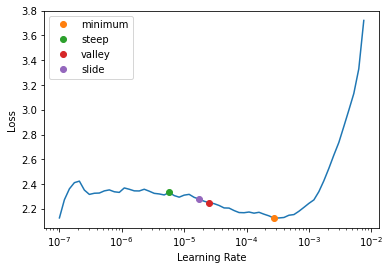

In [26]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [27]:
learn.fit_one_cycle(1, lr_max=4e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,bertscore_precision,bertscore_recall,bertscore_f1,time
0,1.692344,1.658419,0.891694,0.904763,0.898091,1:24:50


Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [28]:
learn.show_results(learner=learn, input_trunc_at=500, target_trunc_at=250)

,text,target,prediction
0,"Tom: Why don’t you give me a chance?Blaire: You’re not my type TomTom: And who is your type?Blaire: Definitely not youTom: ☹Tom: Ok Tom: Got it Guido: Hi, Agata, are you OK?Agata: Hi, Guido. Sure, I'm OK :) And you?Guido: I just have trouble understanding your posts on Facebook. Agata: Really?Guido: Maybe it's because I don't know anything about Java? :(Agata: Thanks for the concern :) All my Twitter posts go to my Facebook account. I think I might change that! Guido: Don't worry :)Agata: By th","Blaire won't give Tom a chance as he's not her type.Agata has a new job, she's learning to code and she likes it. Guido doesn't understand her Facebook posts because he knows nothing about JavaScript.Max and his friends watched the video about canna","[ Blaire doesn't like Tom because he's not her type.Guido has trouble understanding Agata's posts on Facebook. Agata doesn't talk to her husband in Chinese language. Jason Hollis, Rawiri, Daniel, David, Jeremy, Ken, Allen, Brian, Jason, David and Rawiri are all smoking cannabis. Allen and Jason don't believe there is a size relationship between the size of roll-ups and the name of a joint., Catherine is having a change of mind about her life. She runs into an old friend of hers who is already married and has two children. Catherine is still single, still partying. Paul is keeping her in check.Barry is going to join the Women's strike at noon. Jake, Dave, Dave and Kelly are coming with him. They will meet around the campus.John and Tim were apartment hunting the other day. The lady who owns the place actually gave them a strange look. She looked old fashioned so they didn't explain anything to her. The flat is a typical rental, so she must have seen some stuff. The kitchen is OK and the bathroom has been renovated recently. Alan will let John know how it went.]"


In [29]:
test_article = """
About 10 men armed with pistols and small machine guns raided a casino in Switzerland and made off 
into France with several hundred thousand Swiss francs in the early hours of Sunday morning, police said. 
The men, dressed in black clothes and black ski masks, split into two groups during the raid on the Grand Casino 
Basel, Chief Inspector Peter Gill told CNN. One group tried to break into the casino's vault on the lower level 
but could not get in, but they did rob the cashier of the money that was not secured, he said. The second group 
of armed robbers entered the upper level where the roulette and blackjack tables are located and robbed the 
cashier there, he said. As the thieves were leaving the casino, a woman driving by and unaware of what was 
occurring unknowingly blocked the armed robbers' vehicles. A gunman pulled the woman from her vehicle, beat 
her, and took off for the French border. The other gunmen followed into France, which is only about 100 
meters (yards) from the casino, Gill said. There were about 600 people in the casino at the time of the robbery. 
There were no serious injuries, although one guest on the Casino floor was kicked in the head by one of the 
robbers when he moved, the police officer said. Swiss authorities are working closely with French authorities, 
Gill said. The robbers spoke French and drove vehicles with French lRicense plates. CNN's Andreena Narayan 
contributed to this report.
"""
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

In [30]:
outputs = learn.blurr_generate(train['dialogue'][0], key="summary_texts", num_return_sequences=3)
outputs

[{'summary_texts': [" Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really liked the puppy. He wanted to take it home right away. He wants to name it after his dead hamster – Lemmy.",
   " Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really liked the puppy. He wanted to take it home right away. He wants to name it after his dead hamster Lemmy.",
   " Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really li

In [31]:
learn.blurr_summarize(test_article, num_return_sequences=3)

[{'summary_texts': [' About 10 armed with pistols and machine guns robbed the Grand Casino Basel in Switzerland. They made off with several hundred thousand Swiss francs in the early hours of Sunday morning. The robbers spoke French and drove vehicles with French lRicense plates. There were about 600 people in the casino at the time of the robbery.',
   ' About 10 armed with pistols and machine guns robbed the Grand Casino Basel in Switzerland. They made off with several hundred thousand Swiss francs in the early hours of Sunday morning. The robbers spoke French and drove vehicles with French lRicense plates. There were about 600 people in the casino at the time of the raid.',
   ' About 10 armed with pistols and machine guns robbed the Grand Casino Basel in Switzerland. They made off with several hundred thousand Swiss francs in the early hours of Sunday morning. The robbers spoke French and drove vehicles with French lRicense plates. There were about 600 people in the casino at the t

In [32]:
outputs = learn.blurr_generate(train['dialogue'][0], early_stopping=False, num_return_sequences=2)

for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'generated_texts': [" Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really liked the puppy. He wanted to take it home right away. He wants to name it after his dead hamster – Lemmy - he's a great Motorhead fan.Hannah doesn't have Betty's number. Amanda will ask Larry to text him.", " Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really liked the puppy. He wanted to take it home right away. He wants to name it after his dead hamster – Lemmy - he's a great Motorhead fan.Hannah doesn't have Betty's number. Amanda will ask Larry."]}



In [33]:
from transformers import pipeline
summarizer = pipeline("summarization", model="knkarthick/MEETING_SUMMARY")
summarizer(test_article)

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/337 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'summary_text': 'Armed robbers robbed a casino in Switzerland and fled into France with several hundred thousand Swiss francs. As they were leaving the Grand Casino, a woman driving by unknowingly blocked their vehicles. A gunman pulled her from her car and beat her before fleeing to the French border.'}]

In [34]:
batch = btok(test_article, return_tensors="pt")
generated_ids = bmodel.generate(batch["input_ids"])
btok.batch_decode(generated_ids, skip_special_tokens=True)

['About 10 men armed with pistols and small machine guns raided a casino in Switzerland. They made off with several hundred thousand Swiss francs in the early hours of Sunday morning. The robbers spoke French and drove vehicles with French lRicense plates. There were about 600 people in the casino at the time of the robbery.']

In [35]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer(test_article)

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

[{'summary_text': 'About 10 men armed with pistols and small machine guns raided a casino in Switzerland. They made off with several hundred thousand Swiss francs in the early hours of Sunday morning. The robbers spoke French and drove vehicles with French lRicense plates. There were about 600 people in the casino at the time of the robbery.'}]

In [36]:
summarizer = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")
summarizer(test_article)

Downloading:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/300 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'summary_text': "About 10 armed robbers robbed Grand Casino in Basel, Switzerland, of several hundred thousand Swiss francs in the early hours of Sunday morning. A woman driving by unknowingly blocked the robbers' vehicles and one of them beat her to death. One guest was kicked in the head by one of the robbers."}]

In [37]:
learn.blurr_summarize(test_article, num_return_sequences=1)

[{'summary_texts': ' About 10 armed with pistols and machine guns robbed the Grand Casino Basel in Switzerland. They made off with several hundred thousand Swiss francs in the early hours of Sunday morning. The robbers spoke French and drove vehicles with French lRicense plates. There were about 600 people in the casino at the time of the robbery.'}]

In [38]:
from transformers import pipeline
summarizer = pipeline("summarization", model="knkarthick/MEETING_SUMMARY")
summarizer(ARTICLE)

[{'summary_text': 'Liana Barrientos has been married 10 times in 10 years, sometimes only within two weeks of each other. She is accused of faking her marriages as part of an immigration scam.'}]

In [39]:
batch = btok(ARTICLE, return_tensors="pt")
generated_ids = bmodel.generate(batch["input_ids"])
btok.batch_decode(generated_ids, skip_special_tokens=True)

['Liana Barrientos, 39, is charged with two counts of offering a false instrument for filing in the first degree. In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. At one time, she was married to eight men at once, prosecutors say.']

In [40]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer(ARTICLE)

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men, and at one time, she was married to eight men.'}]

In [41]:
summarizer = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")
summarizer(ARTICLE)

[{'summary_text': 'Liana Barrientos, 39, has been married 10 times between 1999 and 2002 in New York, Westchester County, Long Island, New Jersey or the Bronx. On Friday, she pleaded not guilty to two criminal counts of "offering a false instrument for filing in the first degree" on the 2010 marriage license application. She is accused of being involved in an immigration scam.'}]

In [42]:
learn.blurr_summarize(ARTICLE, num_return_sequences=1)

[{'summary_texts': ' Liana Barrientos has been married to at least 10 times between 1999 and 2002. She is charged with two counts of "offering a false instrument for filing in the first degree. She has pleaded not guilty to the charges. She faces up to four years in prison if found guilty.'}]

In [43]:
from transformers import pipeline
summarizer = pipeline("summarization", model="knkarthick/MEETING_SUMMARY")
summarizer(train['dialogue'][0])

[{'summary_text': 'Amanda baked cookies. She will bring Jerry some tomorrow. She wants to get a puppy for her son. Tom is free tomorrow afternoon.'}]

In [44]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer(train['dialogue'][0])

[{'summary_text': "Amanda: I want to get a puppy for my son. Jerry: Sure! Amanda: I baked  cookies. Do you want some?Jerry: Sure. Amanda:  I'll bring you tomorrow :-)Hannah: Hey, do you have Betty's number? Amanda: Lemme check. Larry: Ask Larry."}]

In [45]:
summarizer = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")
summarizer(train['dialogue'][0])

[{'summary_text': "Amanda baked cookies and will bring them to Jerry and Hannah tomorrow. A wants to get a puppy for her son. She took him to the animal shelter last Monday and he really liked it. He wanted to take it home right away. A will get him one of those little dogs that won't grow up too big and eat too much."}]

In [46]:
learn.blurr_summarize(train['dialogue'][0], num_return_sequences=4)

[{'summary_texts': [" Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really liked the puppy. He wanted to take it home right away. He wants to name it after his dead hamster – Lemmy.",
   " Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really liked the puppy. He wanted to take it home right away. He wants to name it after his dead hamster Lemmy.",
   " Amanda baked cookies. Jerry will bring her some tomorrow.Amanda wants to get a puppy for her son. She will get him one of those little dogs that won't grow up too big and eat too much. She took her son to the animal shelter last Monday and he really li

In [47]:
text = '''Hi, I'm David and I'm supposed to be an industrial designer. Um, I just got the project announcement about what the project is. Designing a remote control. That's about it, didn't get anything else. Did you get the same thing? Cool. There's too much gear. Okay. Can't draw. Um. Yeah. Um, well anyway, I don't know, it's just the first animal I can think off the top of my head. Um. Yes. Big reason is 'cause I'm allergic to most animals. Allergic to animal fur, so um fish was a natural choice. Um, yeah, and I kind of like whales. They come in and go eat everything in sight. And they're quite harmless and mild and interesting. Tail's a bit big, I think. It's an after dinner dog then. Hmm. It does make sense from maybe the design point of view 'cause you have more complicated characters like European languages, then you need more buttons. So, possibly. Hmm. Yeah. And you keep losing them. Finding them is really a pain, you know. I mean it's usually quite small, or when you want it right, it slipped behind the couch or it's kicked under the table. You know. Yep. Mm-hmm. I think one factor would be production cost. Because there's a cap there, so um depends on how much you can cram into that price. Um. I think that that's the main factor. Cool.
Okay. Right. Um well this is the kick-off meeting for our our project. Um and um this is just what we're gonna be doing over the next twenty five minutes. Um so first of all, just to kind of make sure that we all know each other, I'm Laura and I'm the project manager. Do you want to introduce yourself again? Okay. Great. Okay. Um so we're designing a new remote control and um Oh I have to record who's here actually. So that's David, Andrew and Craig, isn't it? And you all arrived on time. Um yeah so des uh design a new remote control. Um, as you can see it's supposed to be original, trendy and user friendly. Um so that's kind of our our brief, as it were. Um and so there are three different stages to the design. Um I'm not really sure what what you guys have already received um in your emails. What did you get? Mm-hmm. Is that what everybody got? Okay. Um. So we're gonna have like individual work and then a meeting about it. And repeat that process three times. Um and at this point we get try out the whiteboard over there. Um. So uh you get to draw your favourite animal and sum up your favourite characteristics of it. So who would like to go first? Very good. Mm-hmm. Yeah. Yeah. Right. Lovely. Right. You can take as long over this as you like, because we haven't got an awful lot to discuss. Ok oh we do we do. Don't feel like you're in a rush, anyway. Ach why not We might have to get you up again then. I don't know what mine is. I'm gonna have to think on the spot now. Is that a whale? Ah. Okay. God, I still don't know what I'm gonna write about. Um. I was gonna choose a dog as well. But I'll just draw a different kind of dog. M my favourite animal is my own dog at home. Um That doesn't really look like him, actually. He looks more like a pig, actually. Ah well. Do you? Oh that's very good of you. Uh. Um he's a mixture of uh various things. Um and what do I like about him, um That's just to suggest that his tail wags. Um he's very friendly and cheery and always pleased to see you, and very kind of affectionate and um uh and he's quite quite wee as well so you know he can doesn't take up too much space. Um and uh And he does a funny thing where he chases his tail as well, which is quite amusing, so It is. I think it is. He only does it after he's had his dinner and um he'll just all of a sudden just get up and start chasing his tail 'round the living room. Yeah, so uh Yeah, maybe. Maybe. Right, um where did you find this? Just down here? Yeah. Okay. Um what are we doing next? Uh um. Okay, uh we now need to discuss the project finance. Um so according to the brief um we're gonna be selling this remote control for twenty five Euro, um and we're aiming to make fifty million Euro. Um so we're gonna be selling this on an international scale. And uh we don't want it to cost any more than uh twelve fifty Euros, so fifty percent of the selling price. Sure. All together. Um I dunno. I imagine That's a good question. I imagine it probably is our sale actually because it's probably up to the the um the retailer to uh sell it for whatever price they want. Um. But I I don't know, I mean do you think the fact that it's going to be sold internationally will have a bearing on how we design it at all? Think it will? Um. Hmm. Oh yeah, regions and stuff, yeah. Yeah. Okay. Yeah. Well for a remote control, do you think that will be I suppose it's depends on how complicated our remote control is. Yeah, yeah. Okay. What, just like in terms of like the wealth of the country? Like how much money people have to spend on things like? Aye, I see what you mean, yeah. Marketing. Good marketing thoughts. Oh gosh, I should be writing all this down. Um. Mm. Yeah. Yeah, yeah. Like how much does, you know, a remote control cost. Well twenty five Euro, I mean that's um that's about like eighteen pounds or something, isn't it? Or no, is it as much as that? Sixteen seventeen eighteen pounds. Um, I dunno, I've never bought a remote control, so I don't know how how good a remote control that would get you. Um. But yeah, I suppose it has to look kind of cool and gimmicky. Um right, okay. Let me just scoot on ahead here. Okay. Um well d Does anybody have anything to add to uh to the finance issue at all? Thin No, actually. That would be useful, though, wouldn't it, if you knew like what your money would get you now. Mm-hmm. Yeah, yeah. Oh. Five minutes to end of meeting. Oh, okay. We're a bit behind. Yeah. Right, so do you think that should be like a main design aim of our remote control d you know, do your your satellite and your regular telly and your V_C_R_ and everything? Mm-hmm. Yeah. Or even like, you know, notes about um what you wanna watch. Like you might put in there oh I want to watch such and such and look a Oh that's a good idea. So extra functionalities. Mm-hmm. Hmm. Um okay, uh I'd wel we're gonna have to wrap up pretty quickly in the next couple of minutes. Um I'll just check we've nothing else. Okay. Um so anything else anybody wants to add about what they don't like about remote controls they've used, what they would really like to be part of this new one at all? You keep losing them. Okay. Yeah. W You get those ones where you can, if you like, whistle or make a really high pitched noise they beep. There I mean is that something we'd want to include, do you think? Dunno. Okay maybe. My goodness. Still feels quite primitive. Maybe like a touch screen or something? Okay. Uh-huh, okay. Well I guess that's up to our industrial designer. It looks better. Yeah. Okay. Okay. Right, well um so just to wrap up, the next meeting's gonna be in thirty minutes. So that's about um about ten to twelve by my watch. Um so inbetween now and then, um as the industrial designer, you're gonna be working on you know the actual working design of it so y you know what you're doing there. Um for user interface, technical functions, I guess that's you know like what we've been talking about, what it'll actually do. Um and uh marketing executive, you'll be just thinking about what it actually what, you know, what requirements it has to has to fulfil and you'll all get instructions emailed to you, I guess. Um. Yeah, so it's th the functional design stage is next, I guess. And uh and that's the end of the meeting. So I got that little message a lot sooner than I thought I would, so Mm-hmm. Uh-huh, yeah. Th Okay, well just very quickly 'cause this we're supposed to finish now. Um I guess that's up to us, I mean you probably want some kind of unique selling point of it, so um, you know Yeah. Mm-hmm. Yeah. Okay. Right, okay, we'll that's that's the end of the meeting, then. Um. So, uh thank you all for coming.
Um I'm Craig and I'm User Interface. Yeah. Well, my favourite animal would be a monkey. Then they're small cute and furry, and uh when planet of the apes becomes real, I'm gonna be up there with them. Yeah. I know um My parents went out and bought um remote controls because um they got fed up of having four or five different remote controls for each things the house. So um for them it was just how many devices control. Uh.
Mm-hmm. Great. And I'm Andrew and I'm uh our marketing expert. Mm-hmm. Mm-hmm. Yeah, that's that's it. Yeah. I will go. That's fine. Alright. So This one here, right? Okay. Very nice. Alright. My favourite animal is like A beagle. Um charac favourite characteristics of it? Is that right? Uh, right, well basically um high priority for any animal for me is that they be willing to take a lot of physical affection from their family. And, yeah that they have lots of personality and uh be fit and in robust good health. So this is blue. Blue beagle. My family's beagle. I coulda told you a whole lot more about beagles. Boy, let me tell you. Impressionist. Alright. Mm. Superb sketch, by the way. Yep. I see a dog in there. Yep. Now I see a rooster. What kind is it? Is he aware that th it's his own cha tail he's chasing? Hmm. Probably when he was little he got lots of attention for doing it and has forever been conditioned. 'Kay. Um, can we just go over that again? Uh, so bas at twel Alright, yeah. Okay. So cost like production cost is twelve fifty, but selling price is is that wholesale or retail? Like on the shelf. Our sale our sale anyway. Yeah, okay okay. Okay. Mm-hmm. Alright. Yes. Mm-hmm. Mm-hmm. Well right away I'm wondering if there's um th th uh, like with D_V_D_ players, if there are zones. Um f frequencies or something um as well as uh characters, um different uh keypad styles and s symbols. Um. I don't know. Yeah. Yeah. Yeah. And then a and then al the other thing international is on top of the price. I'm thinking the price might might appeal to a certain market in one region, whereas in another it'll be different, so Just a chara just a characteristic of the Just Or just like, basic product podi positioning, the twenty five Euro remote control might be a big hit in London, might not be such a big hit in Greece, who knows, something like that, yeah. Yep. Right away I'm making some kind of assumptions about what what information we're given here, thinking, 'kay trendy probably means something other than just basic, something other than just standard. Um so I'm wondering right away, is selling twenty five Euros, is that sort of the thi is this gonna to be like the premium product kinda thing or Uh-huh. Mm-hmm. Yep. Yeah, I'd say so, yeah. No. Yeah, yeah. Mm-hmm. Do we have any other background information on like how that compares to other other Yeah. Mm-hmm. Yeah, interesting thing about discussing um production of a remote control for me is that l as you point out, I just don't think of remote controls as somethin something people consciously assess in their purchasing habits. It's just like getting shoelaces with shoes or something. It just comes along. Do you know what I mean? Like so sort of like how do you I I mean one one way of looking at it would be, well the people producing television sets, maybe they have to buy remote controls. Or another way is maybe people who have T_V_ sets are really fed up with their remote control and they really want a better one or something. But Right. Right. Okay so Right, so in function one of the priorities might be to combine as many uses I think so. Yeah, yeah. Yeah. Well like um, maybe what we could use is a sort of like a example of a successful other piece technology is palm palm pilots. They're gone from being just like little sort of scribble boards to cameras, M_P_ three players, telephones, everything, agenda. So, like, I wonder if we might add something new to the to the remote control market, such as the lighting in your house, or um Yeah, yeah. An Yeah. Like, p personally for me, at home I've I've combined the um the audio video of my television set and my D_V_D_ player and my C_D_ player. So they w all work actually function together but I have different remote controls for each of them. So it's sort of ironic that that then they're in there um you know, the sound and everything it's just one system. But each one's got its own little part. Mm. Mm. Mm. Mm-hmm. Mm-hmm. Yeah. Yeah. That's just really good id Yep. Uh, sure. I remember when the first remote control my my family had was on a cable. Actually had a cable between it and the T_V_ and big like buttons that sort of like, like on a blender or something. And um, you know, when I think about what they are now, it's better, but actually it's still kind of, I dunno, like a massive junky thing on the table. Maybe we could think about how, could be more, you know, streamlined. S Something like that, yeah. Or whatever would be technologically reasonable. 'Cause it could b it could it could be that f it could be that functionally that doesn't make it any better, but that just the appeal of of not having You know, these days there's a r pe things in people's homes are becoming more and more like chic, you know. Um, nicer materials and might be be worth exploring anyway. Okay. Um. Before we wrap up, just to make sure we're all on the same page here, um, do we We were given sort of an example of a coffee machine or something, right? Well, um are we at ma right now on the assumption that our television remote control may have features which go beyond the television? Or are we keeping sort of like a a design commitment to television features? I I don't know. Yep. Yeah, sure. Okay. Okay, yeah. Okay. Okay. Okay. Alright.
'''

In [48]:
learn.blurr_summarize(text, num_return_sequences=4)

[{'summary_texts': [" David, Andrew and Craig are meeting to design a new remote control. The project brief is to design an original, trendy and user friendly device. They will be selling it on an international scale for around 50 million Euro. Laura is the project manager. They are going to have a meeting about the project in twenty five minutes. You get to draw your favourite animal and sum up your favourite characteristics of it on the whiteboard. David's favourite animal is his own dog at home.",
   " David, Andrew and Craig are meeting to design a new remote control. The project brief is to design an original, trendy and user friendly device. They will be selling it on an international scale for around 50 million Euro. Laura is the project manager. They are going to have a meeting about the project in twenty five minutes. You get to draw your favourite animal and sum up your favourite characteristics of it on the whiteboard. David's favourite animal is his own dog.",
   " David, A

In [49]:
text = '''
Das : Hi and welcome to the a16z podcast. I’m Das, and in this episode, I talk SaaS go-to-market with David Ulevitch and our newest enterprise general partner Kristina Shen. The first half of the podcast looks at how remote work impacts the SaaS go-to-market and what the smartest founders are doing to survive the current crisis. The second half covers pricing approaches and strategy, including how to think about free versus paid trials and navigating the transition to larger accounts. But we start with why it’s easier to move upmarket than down… and the advantage that gives a SaaS startup against incumbents.
David : If you have a cohort of customers that are paying you $10,000 a year for your product, you’re going to find a customer that self-selects and is willing to pay $100,000 a year. Once you get one of those, your organization will figure out how you sell to, how you satisfy and support, customers at that price point and that size. But it’s really hard for a company that sells up market to move down market, because they’ve already baked in all that expensive, heavy lifting sales motion. And so as you go down market with a lower price point, usually, you can’t actually support it.
Das : Does that mean that it’s easier for a company to do this go-to-market if they’re a new startup as opposed to if they’re a pre-existing SaaS?
Kristina : It’s culturally very, very hard to give a product away for free that you’re already charging for. It feels like you’re eating away at your own potential revenue when you do it. So most people who try it end up pulling back very quickly.
David : This is actually one of the key reasons why the bottoms up SaaS motion is just so competitive, and compelling, and so destructive against the traditional sales-driven test motion. If you have that great product and people are choosing to use it, it’s very hard for somebody with a sales-driven motion, and all the cost that’s loaded into that, to be able to compete against it. There are so many markets where initially, we would look at companies and say, “Oh, well, this couldn’t possibly be bottoms up. It has to be sold to the CIO. It has to be sold to the CSO or the CFO.” But in almost every case we’ve been wrong, and there has been a bottoms up motion. The canonical example is Slack. It’s crazy that Slack is a bottoms up company, because you’re talking about corporate messaging, and how could you ever have a messaging solution that only a few people might be using, that only a team might be using? But now it’s just, “Oh, yeah, some people started using it, and then more people started using it, and then everyone had Slack.”
Kristina : I think another classic example is Dropbox versus Box. Both started as bottoms up businesses, try before you buy. But Box quickly found, “Hey, I’d rather sell to IT.” And Dropbox said, “Hey, we’ve got a great freemium motion going.” And they catalyzed their business around referrals and giving away free storage and shared storage in a way that really helped drive their bottoms up business.
Das : It’s a big leap to go from selling to smaller customers to larger customers. How have you seen SaaS companies know or get the timing right on that? Especially since it does seem like that’s really related to scaling your sales force?
Kristina : Don’t try to go from a 100-person company to a 20,000-person company. Start targeting early adopters, maybe they’re late stage pre-IPO companies, then newly IPO’d companies. Starting in tech tends to be a little bit easier because they tend to be early adopters. Going vertical by vertical can be a great strategy as well. Targeting one customer who might be branded in that space, can help brand yourself in that category. And then all their competitors will also want your product if you do a good job. A lot of times people will dedicate a sales rep to each vertical, so that they become really, really knowledgeable in that space, and also build their own brand and reputation and know who are the right customers to target.
'''

In [50]:
summarizer = pipeline("summarization", model="knkarthick/MEETING_SUMMARY")
summarizer(text)

[{'summary_text': 'In this episode of the a16z podcast, Das talks about SaaS go-to-market with David Ulevitch and Kristina Shen. They discuss the advantages and disadvantages of selling to the right customers at the right price point.'}]

In [51]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer(text)

[{'summary_text': 'David Ulevitch and Kristina Shen talk SaaS go-to-market with Das. They explain why it’s easier to move upmarket than down… and the advantage that gives a SAAS startup against incumbents. They also talk about how to think about free versus paid trials and navigating the transition to larger accounts. The first half of the podcast looks at how remote work impacts the Saas go- to-market.'}]

In [52]:
summarizer = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")
summarizer(text)

[{'summary_text': "Das and Kristina talk about SaaS go-to-market with David Ulevitch and their newest enterprise general partner Kristina Shen on the a16z podcast. They discuss why it's easier for a startup to move upmarket than downmarket and the advantage that gives a startup against incumbents. "}]

In [53]:
export_fname = "summarize_export"

In [54]:
learn.metrics = None
learn.export(fname=f"{export_fname}.pkl")

In [55]:
text = '''
Das : Hi and welcome to the a16z podcast. I’m Das, and in this episode, I talk SaaS go-to-market with David Ulevitch and our newest enterprise general partner Kristina Shen. The first half of the podcast looks at how remote work impacts the SaaS go-to-market and what the smartest founders are doing to survive the current crisis. The second half covers pricing approaches and strategy, including how to think about free versus paid trials and navigating the transition to larger accounts. But we start with why it’s easier to move upmarket than down… and the advantage that gives a SaaS startup against incumbents.
David : If you have a cohort of customers that are paying you $10,000 a year for your product, you’re going to find a customer that self-selects and is willing to pay $100,000 a year. Once you get one of those, your organization will figure out how you sell to, how you satisfy and support, customers at that price point and that size. But it’s really hard for a company that sells up market to move down market, because they’ve already baked in all that expensive, heavy lifting sales motion. And so as you go down market with a lower price point, usually, you can’t actually support it.
Das : Does that mean that it’s easier for a company to do this go-to-market if they’re a new startup as opposed to if they’re a pre-existing SaaS?
Kristina : It’s culturally very, very hard to give a product away for free that you’re already charging for. It feels like you’re eating away at your own potential revenue when you do it. So most people who try it end up pulling back very quickly.
David : This is actually one of the key reasons why the bottoms up SaaS motion is just so competitive, and compelling, and so destructive against the traditional sales-driven test motion. If you have that great product and people are choosing to use it, it’s very hard for somebody with a sales-driven motion, and all the cost that’s loaded into that, to be able to compete against it. There are so many markets where initially, we would look at companies and say, “Oh, well, this couldn’t possibly be bottoms up. It has to be sold to the CIO. It has to be sold to the CSO or the CFO.” But in almost every case we’ve been wrong, and there has been a bottoms up motion. The canonical example is Slack. It’s crazy that Slack is a bottoms up company, because you’re talking about corporate messaging, and how could you ever have a messaging solution that only a few people might be using, that only a team might be using? But now it’s just, “Oh, yeah, some people started using it, and then more people started using it, and then everyone had Slack.”
Kristina : I think another classic example is Dropbox versus Box. Both started as bottoms up businesses, try before you buy. But Box quickly found, “Hey, I’d rather sell to IT.” And Dropbox said, “Hey, we’ve got a great freemium motion going.” And they catalyzed their business around referrals and giving away free storage and shared storage in a way that really helped drive their bottoms up business.
Das : It’s a big leap to go from selling to smaller customers to larger customers. How have you seen SaaS companies know or get the timing right on that? Especially since it does seem like that’s really related to scaling your sales force?
Kristina : Don’t try to go from a 100-person company to a 20,000-person company. Start targeting early adopters, maybe they’re late stage pre-IPO companies, then newly IPO’d companies. Starting in tech tends to be a little bit easier because they tend to be early adopters. Going vertical by vertical can be a great strategy as well. Targeting one customer who might be branded in that space, can help brand yourself in that category. And then all their competitors will also want your product if you do a good job. A lot of times people will dedicate a sales rep to each vertical, so that they become really, really knowledgeable in that space, and also build their own brand and reputation and know who are the right customers to target.
Das : So right now, you’ve got a lot more people working remote. Does this move to remote work mean that on-premise software is dying? And is it accelerating the move to software as a service?
Kristina : This remote work and working from home is only going to catalyze more of the conversion from on-premise over to cloud and SaaS. In general, software spend declines 20% during an economic downturn. This happened in ’08, this happened in ’01. But when we look at the last downturn in ’08, SaaS spend actually, for public companies, increased, on average, 10%, which means there’s a 30% spread, which really shows us that there was a huge catalyst from people moving on-premise to SaaS.
David : And as people work remote, the ability to use SaaS tools is much easier than having to VPN back into your corporate network. We’ve been seeing that, inside sales teams have been doing larger and larger deals, essentially moving up market on the inside, without having to engage with field sales teams. In fact, a lot of the new SaaS companies today rather than building out a field team, they have a hybrid team, where people are working and closing deals on the inside and if they had to go out and meet with a customer, they would do that. But by and large, most of it was happening over the phone, over email, and over videoconferencing. And all the deals now, by definition, are gonna be done remote because people can’t go visit their customers in person.
Das : So with bottoms up, did user behavior and buyer behavior change, so the go-to-market evolved? Or did the go-to-market evolve and then you saw user and buyer behavior change? I’m curious with this move to remote work. Is that going to trigger more changes or has the go-to-market enabled that change in user behavior, even though we see that change coming because of a lot of forces outside of the market?
Kristina : I definitely think they are interrelated. But I do think it was a user change that catalyzed everything. We decided that we preferred better software, and we tried a couple products. We were able to purchase off our credit card. And then IT and procurement eventually said, “Wow, everyone’s buying these already, I might as well get a company license and a company deal so I’m not paying as much.” While obviously software vendors had to offer the products that could be self-served, users started to realize they had the power, they wanted to use better software, they paid with their credit cards. And now software vendors are forced to change their go-to-market to actually suit that use case.
Das : If that’s the case that when user behavior has changed, it’s tended to be the catalyzing force of bigger changes in the go-to-market, what are some of the changes you foresee for SaaS because the world has changed to this new reality of remote work and more distributed teams?
David : We’re in a very uncertain economic environment right now. And a couple of things will become very clear over the next 3 to 9 to 15 months — you’re going to find out which SaaS products are absolutely essential to helping a business operate and run, and which ones were just nice to have and may not get renewed. I think on the customer, buying side, you’re very likely to see people push back on big annual commitments and prefer to go month-to-month where they can. Or you’ll see more incentives from SaaS startups to offer discounts for annual contracts. You’re going to see people that might sign an annual contract, but they may not want to pay upfront. They may prefer to meter the cash out ratably over the term of the contract. And as companies had empowered and allowed budget authority to be pushed down in organizations, you’re gonna see that budget authority get pulled back, more scrutiny on spending, and likely a lot of SaaS products not get renewed that turned out to not be essential.
Kristina : I think the smartest founders are making sure they have the runway to continue to exist. And they’re doing that in a couple of ways. They’re preserving cash, and they are making sure that their existing customers are super, super happy, because retaining your customers is so important in this environment. And they’re making sure that they have efficient or profitable customer acquisition. Don’t spend valuable dollars acquiring customers. But acquire customers efficiently that will add to a great existing customer base.
Das : To go into pricing and packaging for SaaS for a moment, what are some of the different pricing approaches that you see SaaS companies taking?
Kristina : The old school way of doing SaaS go-to-market is bundle everything together, make the pricing super complex, so you don’t actually understand what you’re paying for. You’re forced to purchase it because you need one component of the product. New modern SaaS pricing is keep it simple, keep it tied to value, and make sure you’re solving one thing really, really well.
David : You want to make it easy for your customers to give you money. And if your customers don’t understand your pricing, that’s a huge red flag. Sometimes founders will try to over engineer their pricing model.
Kristina : We talk a lot about everything has to be 10X better than the alternatives. But it’s much easier to be 10X better when you solve one thing very, very well, and then have simple pricing around it. I think the most common that most people know about is PEPM or per employee per month, where you’re charging basically for every single seat. Another really common model is the freemium model. So, think about a Dropbox, or an Asana, or a Skype, where it’s trigger based. You try the product for free, but when you hit a certain amount of storage, or a certain amount of users, then it converts over to paid. And then you also have a time trial, where you get the full experience of the product for some limited time period. And then you’re asked if you want to continue using the product to pay. And then there’s pay as go, and particularly, pay as you go as a usage model. So, Slack will say, “Hey, if your users aren’t actually using the product this month, we won’t actually charge you for it.”
David : The example that Kristina made about Slack and users, everybody understands what a user is, and if they’re using the product, they pay for it, and if they’re not using it, they don’t pay for it. That’s a very friendly way to make it easy for your customers to give you money. If Slack came up with a pricing model that was like based on number of messages, or number of API integration calls, the customer would have no idea what that means.
Kristina : There’s also the consumption model. So Twilio only charges you for every SMS text or phone call that you make on the platform any given month. And so they make money or lose money as your usage goes. The pricing is very aligned to your productivity.
David : Generally, those are for products where the usage only goes in one direction. If you think of a company like Databricks, where they’re charging for storage, or Amazon’s S3 service, it is very aligned with the customer, but it also strategically aligns with the business because they know the switching cost is very high, the churn is very low. And generally, in those businesses, you’re only going to store more data, so they can charge based on usage or volume of data.
Kristina : Recently, there’s been a huge trend of payment as a revenue. It’s particularly common in vertical markets where SaaS companies are adding payments as a revenue in addition to their employee or subscription revenue. If you look at Shopify, for example, more than 50% of their revenue is actually payment revenue. They’re making money every single time you purchase something off one of their shopping cart websites.
Das : When you’re working with a founder or a SaaS startup, how have you seen them find the right pricing model for their product, for their market?
Kristina : Step one is just talk to a lot of customers. Try to figure out what is the market pricing for possible alternatives or competitors, understand their pain points and their willingness to pay. And just throw a price out there, because you have to have a starting point in order to actually test and iterate. Particularly in the SMB, or the bottoms up business, you can test and iterate pretty quickly because you have so many data points.
David : I always tell founders, step one is to just go out there and talk to customers. Step two is just double your prices. I don’t think there’s ever been a great company with a great product that’s fallen apart because their pricing was wrong. But a lot of SaaS startup founders really under price, and you don’t want to find out two or three years later that you were 200% underpriced. A very common thing that SaaS companies do, they’ll have the basic package that either is free or low cost, that you can just sign up online for. They’ll have a middle package where they share some pricing, and then they’ll have the enterprise package where you have to contact sales to find out more. And that way they don’t actually have to show the pricing for that third package. And that gives the salespeople the flexibility to adjust pricing on a per deal basis.
Das : When you’re working with companies, why are they underpricing their products?
David : I think it’s psychological. People need to price on value, and they don’t know how much value they’re delivering relative to “Oh, it only cost me $100 a month to provide this service, so I just need to charge $200.” But if it turns out you’re saving your customer $50,000 a year, then you’re wildly underpriced. You have to remember that SaaS is essentially a proxy for outsourced IT. You’re spending money on a SaaS service to not pay to develop something internally, or to have to pay IT to support something that’s more complex on-prem. Software is much cheaper than people, and so generally, the price point can be much higher.
Kristina : And the other thing is your value increases over time. You’re delivering more features, more products, you understand the customer better. It’s the beauty of the SaaS model and cloud model that you can iterate and push code immediately, and the customer immediately sees value. A lot of times people have the same price point from the first customer sold to three years later and the 200th customer. Quite frankly, you’ve delivered so much value along the way that your price point should have gone up. The other thing I’ll say is a lot of people discount per seat pricing a lot as they move up market. We tend to tell people that the best validation of your product having great product market fit is your ability to hold your price point. So while there is some natural discounting on a per seat basis because people do deserve some volume discounting, I would say try to resist that as much as possible.
Das : Especially for a technical founder, it’s so tempting to get in there and fiddle with these knobs. How do you know when it is time to experiment with your pricing and packaging?
David : If you’re looking at your business and you see that you are doing more deals, and they’re closing faster, you should raise your pricing. And you pay attention to how long it takes to close deals and whether the number of deals is staying consistent as you do that. And, at some point, you’re going to find out when you’re losing deals on price. I think a moment where companies have to plan ahead to avoid having to course correct is after they roll out massive pricing and packaging changes, which are pretty natural as companies move up market. But how they navigate that transition to larger accounts, and how they either bring along or move away from those smaller, earlier customers who got them to where they are, tends to be really important because they can get a lot of noise on Twitter, they can get a lot of blowback from their customers. So Zendesk is a company where they rolled out a major packaging change. And when they rolled it out, they hadn’t planned on grandfathering in their early customers. They got a lot of pushback, and very quickly, they put out a blog post and said, “We hear what you’re saying, we appreciate you building the business that we’ve become today. We do need to have a package for the future. But all the people that have been customers so far will be grandfathered in for at least a period of time into the old model.”
Kristina : If you iterate pricing constantly, you don’t really have this problem because your customers will be used to pricing changes. You normally pair them with new features, and it all kind of works out. But if you have to go through a big grandfather change, I tend to lean towards treating your early customers really, really well. They adopted when you weren’t a big company yet. They probably co-built the product with you in many ways. And so, it’s great to get more dollars out of your customer base, but treat your early customers well.
Das : Are there any other failure modes that you see startups really falling into around pricing and packaging or any common mistakes that they make?
David : I think a lot of founders don’t always map out the cost or model of their pricing and their product relative to their cost of actually doing sales and marketing and customer acquisition.
Kristina : Inside sales is so popular in Silicon Valley. When you’re selling more to an SMB or mid-market type customer, the expectation is that you’re educating and helping the prospective customer over the phone. And so, you’re not expected to be as high touch. But 5K is almost the minimum price point you need to sell to the SMB with an inside sales team in order to pay for the outbound costs and all the conversions, because there is typically a team that sits around the quota carrying rep. And so, price matching — how much your price point is compared to what your go-to-market motion is — matters a lot. Other big failure modes that I see, people guess the ramp time of a sales rep wrong. And ramp time really ties to the segment of customer you’re selling into. It tends be that if you’re selling into the enterprise, the ramp time for sales reps, because sales cycles are so long, tend to be much longer as well. They could be six months plus, could be a year. While if you’re selling more into SMB or mid-market, the ramp time to get a rep up and running can be much shorter, three to six months. Because the sales cycles are shorter, they just iterate much faster, and they ramp up much more quickly.
David : The other thing that people have to understand is that sales velocity is a really important component to figuring out how many reps you should be hiring, whether they should be inside reps or field reps. If it takes you 90 days to close a deal, that can’t be a $5,000 a year deal, that has to be a $50,000 or even $150,000 a year deal.
Das : Kristina, I know you’ve done a lot of work with metrics. So how do those play in?
Kristina : Probably the one way to sum it all together is how many months does it take to pay back customer acquisition cost. Very commonly within the SaaS world, we talk about a 12-month CAC payback. We typically want to see for every dollar you spend on sales and marketing, you get a dollar back within a year. That means you can tweak the inputs any way you want. Let’s say that doing paid acquisition is really effective for you. Then, you can spend proportionally more on paid acquisition and less on sales reps. Vice versa, if you have a great inbound engine, you actually can hire a lot more sales reps and spend more on sales headcount. With all formulas, it’s a guide rail, so if you have customers that retain really, really well, let’s say you’re selling to the enterprise, and you’ve got a 90% or 95% annual retention rate, then your CAC payback could be between 12 and 24 months. But let’s say you’re selling to the SMB and churn is 2% or 3% monthly, which ends up being like 80% to 90% annual retention. Then, because your customer is less sticky, I would recommend looking at a CAC payback of 6 to 12 months.
Das : How should you think about doing a free trial versus a paid trial?
David : On the one hand, the bottoms up motion where people can try essentially a full version of a product before they buy it is extremely powerful. On the other hand, I’ve started to try to think about how I advise companies, when they are thinking about a free trial for something that might cost $100,000 or $200,000 a year? Do we do a paid pilot that has some sort of contractual obligation that if we meet then turns into a commercial engagement?
Kristina : I do think the beauty of the bottoms up business is that you can get people to try the entire experience of the product for free, and they fall in love with it, and a certain percentage will convert. And that works really, really well for products that can self-serve. When you start moving up market to more complex products, the challenge with trials is it takes work to actually implement the product, whether it be integrations, IT has to give access, etc. You lose that self-serve ability, which is so amazing in the trial. And so, I tend to be more in the camp of paid trials, if it costs you money to actually deploy the trial. And when you’re selling to bigger customers, they associate value when they have to pay. Once a customer has to pay you, then they feel a need to make the project successful and thus they will onboard, schedule things, give you data and access.
David : If you can get to a point where you get the customer to do that paid pilot, such that the only difference between a pilot and an actual customer is just the signing of a contract, that’s very powerful. Now, that does force you to have a really good pre-sales motion to make sure that you can deliver on the promise you’ve made your customers. When companies don’t have a great product, and they paper over it with professional services and sales engineering and post-sales support, that paid pilot thing doesn’t work because the experience isn’t good enough. So, it really is incumbent on the SaaS company that does a paid pilot to make sure that they are able to deliver on that experience.
Kristina : And one emerging trend recently is people signing an annual contract with a one or three month out, as a replacement to the paid pilot. Because it’s the best of both worlds, the SaaS company that’s selling the product gets a higher level of commitment. And the customer gets the optionality of opting out in the same way as a trial without any clawback. It really comes down to where procurement falls. Sometimes procurement is at the beginning of that decision, which makes it more like an annual contract. Sometimes procurement is at the one or three month opt-out period, which means the customer already has a great experience, loves the product, and it is an easier way to convert procurements to actually sign on…
David : And that is a really good segue into renewals. I always tell founders, you might have this subscription business, but it’s not a recurring revenue business until the second year when the revenue actually recurs. I think you really have the first three months to get a customer up and running and happy. And if they’re not, you then have about three months to fix it. And if all that works out, then the remaining six months of the contract can be focused on upsell and expansion.
Das : Awesome. Thank you, Kristina. Thank you, David.
Kristina : Thanks so much for having us. This was fun.
David : Yeah, a lot of fun, great topics, and our favorite thing to talk about.
'''

In [56]:
inf_learn = load_learner(fname=f"{export_fname}.pkl")
inf_learn.blurr_summarize(text, num_return_sequences=2)

[{'summary_texts': [" David Ulevitch and Kristina Shen talk about the SaaS go-to-market with a 16z podcast. They discuss why it's easier to move upmarket than downmarket. They also discuss the advantage that gives a startup against incumbents. The first half of the podcast looks at how remote work impacts the SAAS go to market. The second half covers pricing approaches and strategy, including how to think about free versus paid trials.",
   " David Ulevitch and Kristina Shen talk about the SaaS go-to-market with a 16z podcast. They discuss why it's easier to move upmarket than downmarket. They also discuss the advantage that gives a startup an advantage against incumbents. The first half of the podcast looks at how remote work impacts the SAAS go to market. The second half covers pricing approaches and strategy."]}]

In [57]:
inf_learn = load_learner(fname=f"{export_fname}.pkl")
inf_learn.blurr_summarize(text, num_return_sequences=1)

[{'summary_texts': " David Ulevitch and Kristina Shen talk about the SaaS go-to-market with a 16z podcast. They discuss why it's easier to move upmarket than downmarket. They also discuss the advantage that gives a startup against incumbents. The first half of the podcast looks at how remote work impacts the SAAS go to market. The second half covers pricing approaches and strategy, including how to think about free versus paid trials."}]